# Part I - (Prosper Loan Dataset)
## by (Ibukun Racheal Olaseile)

## Introduction
> The dataset used in this report is Prosper Loan Data, Prosper is a california based company that issues loan to borrowers at a low interest rate. I will be using the various python libraries (Numpy, Pandas, Matplotlib and seaborn ) for exploration and explanation analysis. The various data visualizations made in this project will help me futher understand my dataset.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv ('prosperLoanData.csv')

In [3]:
#Determing the type of dataset I'm working with
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield    ...     LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380    ...            -133.18                0.0   
1        0.0920       0.0820    ...               0.00                0.0   
2        0.2750       0.2400    ...             -24.20                0.0   
3        0.0974       0.0874    ...            -108.01                0.0   
4        0.2085       0.1985    ...             -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [4]:
#Determing the structure of my dataset
df.shape

(113937, 81)

### What is the structure of your dataset?

> There are 113937 rows in this dataset and 11 columns .

### What is/are the main feature(s) of interest in your dataset?

1) I will be checking if some metrics like owning a home, income verification, employment status etc determine the outcome of loans disbursement .
2) Does the income range determine the loan outcome 
3) What determines the borrower Annual Percentage Rate (APR ) 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> BorrowerAPR,LoanOriginalAmount, Term, ProsperScore, ProsperRating

In [5]:
#Determing the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
#From the information above,it is seen that the LoanOriginationDate has the wrong data type, this should be corrected .

df.LoanOriginationDate = pd.to_datetime(df.LoanOriginationDate)

In [7]:
#Checking to see if it has the right datatype

df.LoanOriginationDate.dtype

dtype('<M8[ns]')

In [8]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [9]:
# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
df['EmploymentStatus'] = df['EmploymentStatus'].astype(ordered_var)

IncomeRange_order = ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+ ','Not displayed','Not employed']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories =IncomeRange_order)
df['IncomeRange'] = df['IncomeRange'].astype(ordered_var)


## Univariate Exploration





# Question 

What is the  percentage of borrowers that has home as against does who are home owners, does the income being verifiable determines the loan outcome?

How does the employment status and income range affect the loan outcome?

In [10]:
#Ascertaining the value counts of borrower being a home owner and Income being verifiable 

sorted_counts = df['IsBorrowerHomeowner'].value_counts()
sorted_counts2 = df['IncomeVerifiable'].value_counts()

sorted_counts

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [11]:
sorted_counts2

True     105268
False      8669
Name: IncomeVerifiable, dtype: int64

# Visualization

In [12]:
#Defining functions to avoid repetition of codes to dertermine if borrower being a home owner & income being verifiable are determinant factors to access a loan.

def func_plot(data,var1,var2):
    plt.figure(figsize= [15,5])
    sorted_count1 = df[var1].value_counts()
    sorted_count2 = df[var2].value_counts()
    
    plt.subplot(1,2,1)
    plt.pie (sorted_count1,labels = sorted_count1.index,startangle = 90, counterclock = False,autopct='%1.1f%%')
    plt.title('Is Borrower a home owner')
    
    
    plt.subplot(1,2,2)
    plt.pie (sorted_count2, labels = sorted_count2.index,startangle = 90, counterclock = False,autopct='%1.1f%%')
    plt.title ('IncomeVerifiable?')

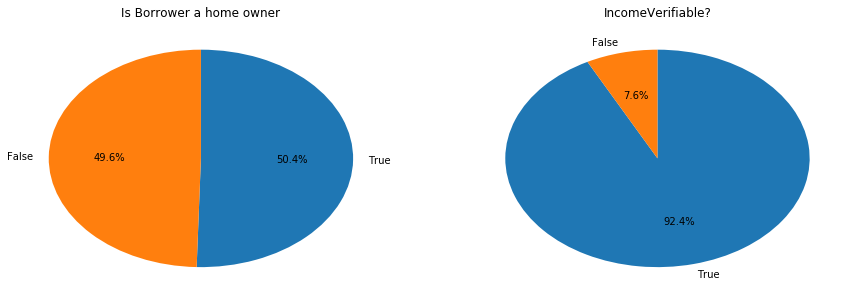

In [13]:
func_plot(df,'IsBorrowerHomeowner','IncomeVerifiable')

# Observations

Observations : From the charts above, we can deduce that the borrower being a home owner does not influence access to loans as we have significant people without mortgages accessing the loans.

Whereas, it is evident that income verification might be a great determinant in accessing loans.

In [14]:
base_color = sb.color_palette()[0]
color1 = sb.color_palette()[-1]

In [15]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
$100,000+             0
Name: IncomeRange, dtype: int64

In [16]:
df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

# Question 

What's the distribution of EmploymentStatus and IncomeRange ?

# Visualization

In [17]:
#Using Functions to plot the charts to avoid repeating codes

def func_plot(data1,var1, var2):
    plt.figure(figsize= [20,5])
    Employment_stat_value = df[var1].value_counts()
    Employment_stat_val_order = Employment_stat_value.index
    Income_range_value = df[var2].value_counts()
    Income_range_value_order = Income_range_value.index 
    
   
    plt.subplot(1,2,1)
    sb.countplot(data = df , x = var1, color= base_color,order = Employment_stat_val_order )
    plt.xticks(rotation = 90)
    plt.title('Distribution of EmployeeStatus',fontsize = 16, weight ='bold');
    #plt.ylabel("the No of loans taken per ",var1);

    plt.subplot(1,2,2)
    sb.countplot(data = df , x = var2 , color= color1, order= Income_range_value_order)
    plt.xticks(rotation = 90)
    plt.title('Distrbution of Income Ranges',fontsize = 16, weight ='bold');
    #plt.ylabel("the No of loans taken per ", var2);
    

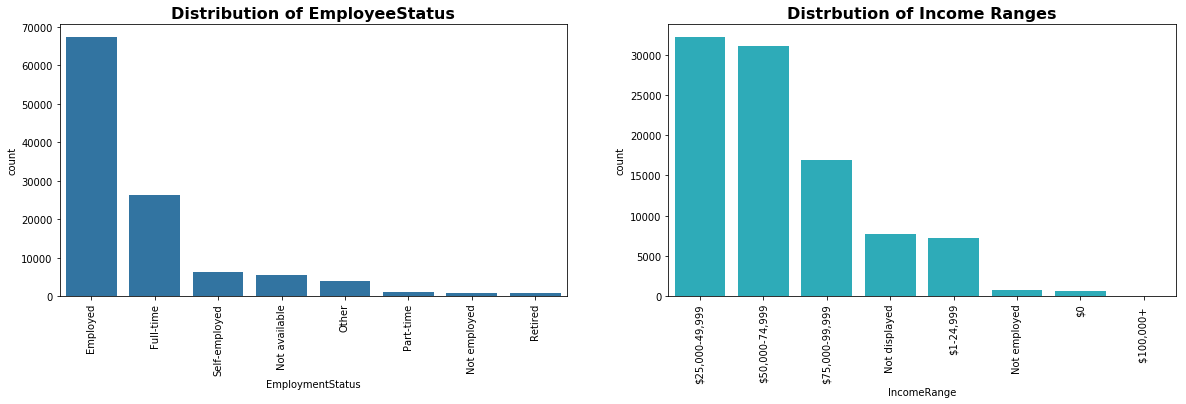

In [18]:
func_plot(df,"EmploymentStatus", "IncomeRange")

# Observation

 From the visualizations above, the highest no of people with access to loans are Employed while the least is Retired, this isnt suprising as they might not have means of repaying their loans.

Whereas, borrowers within the $(25,000-49,999) Income range has the highest records of loans.

# Question 

What's the distribution of BorrowerAPR?

# Visualization

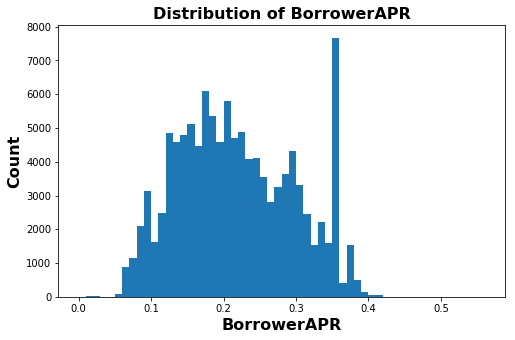

In [19]:
#Finding the distribution of BorrowerAPR
bins = np.arange(0,df.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(df['BorrowerAPR'].dropna().values, bins = bins)
plt.title('Distribution of BorrowerAPR', fontsize = 16, weight = 'bold')
plt.xlabel('BorrowerAPR',fontsize = 16, weight = 'bold')
plt.ylabel('Count',fontsize = 16, weight = 'bold')
plt.show()

# Observation

Observation : The distribution of the BorrowerAPR is multimodal, as we can see various peaks on the chart with the highest peak recorded between 0.35 and 0.36.

# Question 

What's the distribution of StatedMonthlyIncome?

# Visualization

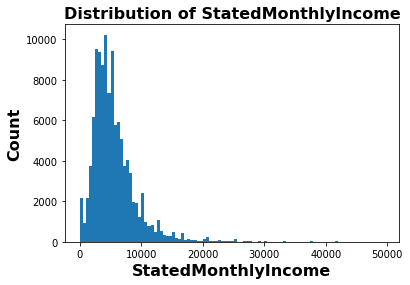

In [20]:
# Distribution of stated monthly income
bins = np.arange(0, 50000, 500)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins=bins)
plt.title('Distribution of StatedMonthlyIncome', fontsize = 16, weight = 'bold')
plt.xlabel('StatedMonthlyIncome',fontsize = 16, weight = 'bold')
plt.ylabel('Count',fontsize = 16, weight = 'bold')
plt.show()


# Observation

The distribution of the Stated Monthly Income is positive skewed, ie right skewed, and most of the income falls below 30k

## Bivariate Exploration
For my bivariate exploration, I want to explore the relationship that exists between the ProsperScore and other metrics e.g EmploymentStatus,IncomeRange, Investors .

I will also want to know the kind of relationship between the BorrowerAPR and LoanOriginalAmount. I will be using the violinplot, scatterplot and box plot to achieve these.



# Question

What's the relationship between EmploymentStatus and ProsperScore?

# Visualization

In [21]:
#Checking for relationship between EmploymentStatus and ProsperScore 
def Func_plot2(datas, var1,var2):
    plt.figure(figsize=[18,4])
    plt.subplot(1,2,1)
    sb.violinplot(data = df , x = var1, y =var2, color=color1)
    plt.title('ProsperScore against EmploymentStatus',fontsize = 16, weight = 'bold')
    plt.xticks(rotation = 45)

    plt.subplot(1,2,2)
    sb.boxplot(data = df , x = var1, y =var2, color=color1)
    plt.title('ProsperScore against EmploymentStatus',fontsize = 16, weight = 'bold')
    plt.xticks(rotation = 45)

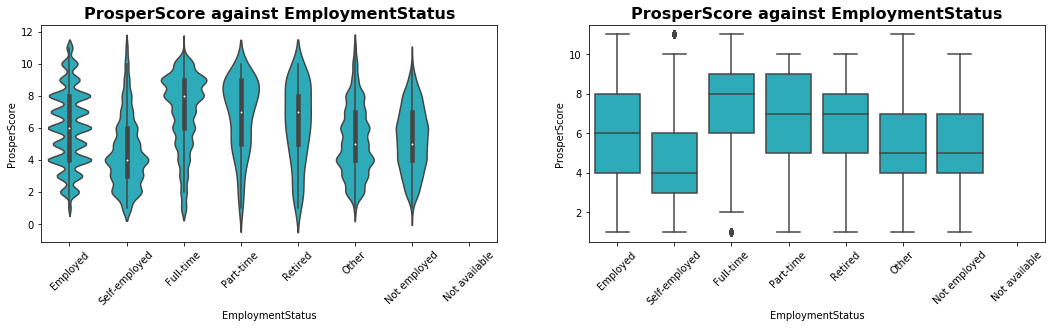

In [22]:
Func_plot2(df,"EmploymentStatus", "ProsperScore")

# Observation

From the charts above,it can deduced that the Full-time employees have better Prosperscore rating as against the others. 

# Question

What's the relationship between ProsperScore and IncomeRange?

# Visualization

In [23]:
#Checking for relationship between ProsperScore and IncomeRange
def Func_plot2(datas, var1,var2):
    plt.figure(figsize=[18,4])
    plt.subplot(1,2,1)
    sb.violinplot(data = df , x = var1, y =var2, color=base_color)
    plt.title('ProsperScore against IncomeRange',fontsize = 16, weight = 'bold')
    plt.xticks(rotation = 45)

    plt.subplot(1,2,2)
    sb.boxplot(data = df , x = var1, y =var2, color=base_color)
    plt.title('ProsperScore against IncomeRange',fontsize = 16, weight = 'bold')
    plt.xticks(rotation = 45)

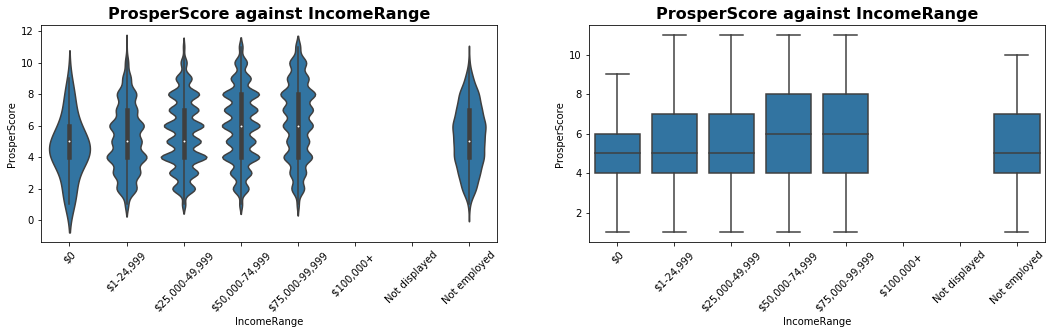

In [29]:
Func_plot2(df,"IncomeRange", "ProsperScore")

# Observation


Employees with income of between (75,000-$99,999)  have the highest prosperscore rating.

# Question

What's the relationship between prosperScore and Investors ?

# Visualization


Text(0.5,0,'ProsperScore')

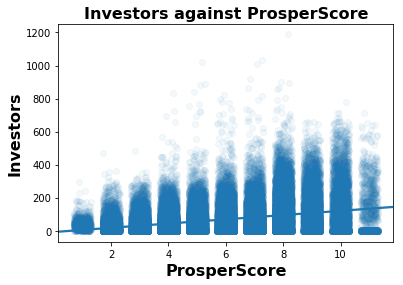

In [24]:
# Scatter plot
#Relationship between ProsperScore and Investors
sb.regplot(data = df, x = 'ProsperScore', y = 'Investors', truncate=False, x_jitter=0.3,y_jitter = 0.3,scatter_kws={'alpha':1/20});
plt.title('Investors against ProsperScore', fontsize = 16, weight = 'bold')
plt.ylabel('Investors',fontsize = 16, weight ='bold')
plt.xlabel ('ProsperScore', fontsize = 16,weight ='bold')



# Observation

Observation : There is a positive correlation between Investors and Prosperscore.

# Question

What's the correlation between BorrowerAPR and LoanOriginalAmount?

# Visualization

Text(0.5,0,'BorrowerAPR')

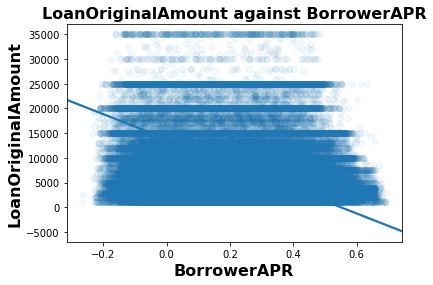

In [25]:
# Scatter plot
#Relationship between BorrowerAPR and LoanOriginalAmount
sb.regplot(data = df, x = 'BorrowerAPR', y = 'LoanOriginalAmount', truncate=False, x_jitter=0.3,y_jitter = 0.3,scatter_kws={'alpha':1/20});
plt.title('LoanOriginalAmount against BorrowerAPR', fontsize = 16, weight = 'bold')
plt.ylabel('LoanOriginalAmount',fontsize = 16, weight ='bold')
plt.xlabel ('BorrowerAPR', fontsize = 16,weight ='bold')


# Obssrvation

There is a negative correlation between the BorrowerAPR and LoanOriginalAmount ie as one increases, the other decreases

## Multivariate Exploration

For my multivariate exploration,I will be exploring the outcome of  (Prosper Rating & Term ) on BorrowerAPR and LoanOriginalAmont

# Question

What effect does the term has on the relationship between BorrowerAPR and LoanOriginalAmount

# Visualization


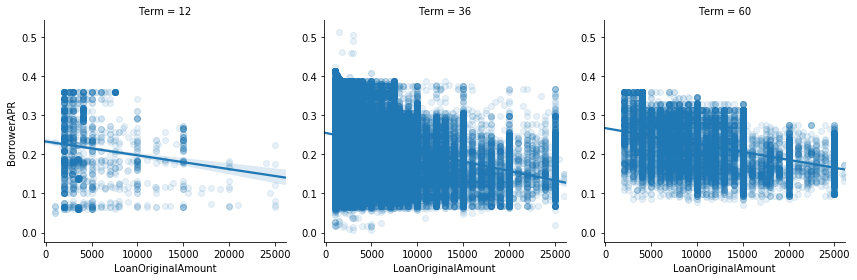

In [32]:
g = sb.FacetGrid(data = df, col = 'Term', size = 4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR',x_jitter = 0.03,scatter_kws={'alpha':0.1});

# Observation

The duration of term does not affect the relationship between BorrowerAPR and LoanOriginalAmount 

# Question

What's the effect of ProsperRating on the the relationship between BorrowerAPR and LoanOriginalAmount


# Visualization

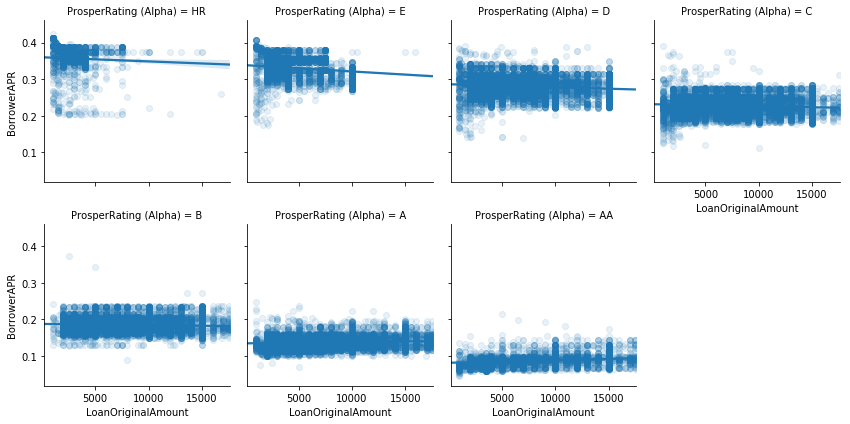

In [33]:
# Prosper rating effect on relationship of BorrowerAPR and loanOriginalamount
g=sb.FacetGrid(data=df, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});



# Observation

The correlation between the BorrowerAPR and LoanOriginalAmount overtime moved from negative to positive as Prosper Rating move from HR to AA.

# Question

What's the BorrowerAPR across ProsperRating and Term?

# Visualization

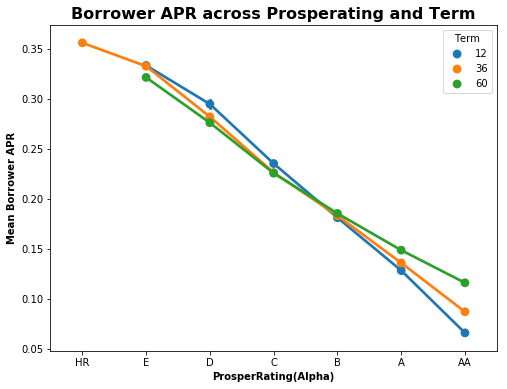

In [28]:
plt.figure(figsize = [8,6])

ax = sb.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term')
plt.title('Borrower APR across Prosperating and Term',Fontsize = 16, weight = 'bold')
plt.ylabel('Mean Borrower APR',weight = 'bold')
plt.xlabel ('ProsperRating(Alpha)', weight = 'bold')
ax.set_yticklabels([],minor = True);
plt.show();

# Observation

The BorrowerAPR decreases as the term increases for ProsperRating between (HR-C) while there was an Increament in the BorrowerAPR for ProsperRating (B-AA)

## Conclusions
From the explorations I did and the visualizations made so far, we can conclude that being a HomeOwner doesnt affect your loan outcome but your Income being verifiable could be a strong determinant factor in the outcome of the loan.

Secondly, people that are fully employed are most likely to be given loans. 

Thirdly, there seems to be a negtaive correlation between the amount of your loan and BorrowerAPR, this implies that the the more loan you acquire, the less your BorrowerAPR, but surprisingly this also depends on the Term of loan and  ProsperRating as shown in the last chart.